In [1]:
import os
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__


TensorFlow 1.x selected.


'1.15.2'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/tmp/'
# !git clone https://github.com/tensorflow/models.git
# !git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI/
!make
!cp -r pycocotools ./../../models/research/
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
%cd /content/gdrive/My Drive/tmp/models/research/
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/tmp/models/research/:/content/gdrive/My Drive/tmp/models/research/slim'
!python setup.py build
!python setup.py install
# !wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz
# !tar -xvf ssd_mobilenet_v1_coco_11_06_2017.tar.gz
# !wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/ssd_mobilenet_v1_coco.config
os.environ['PYTHONPATH'] = ':../content/:../content/slim/:'+os.environ['PYTHONPATH']

/content/gdrive/My Drive/tmp
/content/gdrive/My Drive/tmp/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latt

In [0]:
# train
!python object_detection/model_main.py  \
--pipeline_config_path=ssd_mobilenet_v1_coco.config \
--model_dir=ssd_mobilenet_v1_coco_11_06_2017/ \
--num_train_steps=200 \
--sample_1_of_n_eval_examples=1 \

In [0]:
!pwd

/content/gdrive/My Drive/tmp/models/research


In [0]:
!python object_detection/export_inference_graph.py \
--input_type image_tensor \
--pipeline_config_path ssd_mobilenet_v1_coco.config \
--trained_checkpoint_prefix ssd_mobilenet_v1_coco_11_06_2017/model.ckpt \
--output_directory My_exp_graph/

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0330 16:59:46.782690 140293041960832 module_wrapper.py:139] From object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0330 16:59:47.539731 140293041960832 module_wrapper.py:139] From /content/gdrive/My Drive/tmp/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0330 16:59:47.541595 140293041960832 module_wrapper.py:139] From /content/gdrive/My Drive/tmp/models/research/object_detection/exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.pla

In [0]:
!zip -r MY_exp_g.zip My_exp_graph

  adding: My_exp_graph/ (stored 0%)
  adding: My_exp_graph/model.ckpt.data-00000-of-00001 (deflated 7%)
  adding: My_exp_graph/model.ckpt.index (deflated 68%)
  adding: My_exp_graph/checkpoint (deflated 42%)
  adding: My_exp_graph/model.ckpt.meta (deflated 95%)
  adding: My_exp_graph/frozen_inference_graph.pb (deflated 13%)
  adding: My_exp_graph/saved_model/ (stored 0%)
  adding: My_exp_graph/saved_model/variables/ (stored 0%)
  adding: My_exp_graph/saved_model/saved_model.pb (deflated 14%)
  adding: My_exp_graph/pipeline.config (deflated 69%)


In [4]:
!pwd

a3c_blogpost			  lstm_object_detection
adversarial_crypto		  marco
adversarial_logit_pairing	  maskgan
adversarial_text		  My_exp_graph
adv_imagenet_models		  MY_exp_g.zip
astronet			  namignizer
attention_ocr			  neural_gpu
audioset			  neural_programmer
autoaugment			  next_frame_prediction
autoencoder			  nst_blogpost
brain_coder			  object_detection
build				  object_detection.egg-info
cognitive_mapping_and_planning	  pcl_rl
cognitive_planning		  ptn
compression			  pycocotools
cvt_text			  qa_kg
data				  README.md
deep_contextual_bandits		  real_nvp
deeplab				  rebar
deep_speech			  sentiment_analysis
delf				  seq2species
dist				  setup.py
domain_adaptation		  skip_thoughts
efficient-hrl			  slim
feelvos				  ssd_mobilenet_v1_coco_11_06_2017
fivo				  ssd_mobilenet_v1_coco_11_06_2017.tar.gz
global_objectives		  ssd_mobilenet_v1_coco.config
im2txt				  steve
inception			  street
keypointnet			  struct2depth
learned_optimizer		  swivel
learning_to_remember_rare_events  tcn
learn

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops
%matplotlib inline
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util


In [0]:
MODEL_NAME = 'My_exp_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'training/object-detection.pbtxt'
NUM_CLASSES = 1 #remember number of objec

In [0]:
detection_graph = tf.Graph()

with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


In [0]:

# Loading label map
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
#Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)


In [0]:

# Detection -------------------------------------------------------
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 10) ]
# Size, in inches, of the output images.
IMAGE_SIZE = (40, 24)

In [0]:

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict



In [5]:
!pwd

/content/gdrive/My Drive/tmp/models/research


In [0]:
PATH_TO_TEST_IMAGES_DIR = '/content/gdrive/My Drive/tmp/tmp_img/'

In [0]:
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'raccoon-{}.jpg'.format(i)) for i in range(1, 5) ]


In [22]:
TEST_IMAGE_PATHS

['/content/gdrive/My Drive/tmp/tmp_img/raccoon-1.jpg',
 '/content/gdrive/My Drive/tmp/tmp_img/raccoon-2.jpg',
 '/content/gdrive/My Drive/tmp/tmp_img/raccoon-3.jpg',
 '/content/gdrive/My Drive/tmp/tmp_img/raccoon-4.jpg']

In [0]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

In [0]:
%matplotlib inline


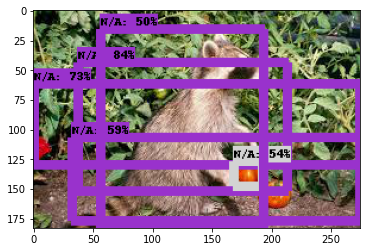

In [32]:
plt.Figure(figsize=(20,20))
plt.imshow(image_np)